In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
import pandas as pd
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import os

import kagglehub

In [ ]:
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
train_dir = os.path.join(path, 'Training')
test_dir = os.path.join(path, 'Testing')

Using Colab cache for faster access to the 'brain-tumor-mri-dataset' dataset.


In [ ]:
BATCH_SIZE = 64
IMG_SIZE = (128, 128) # Increased slightly for better detail

# Create datasets using the modern tf.data API
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [ ]:
model = models.Sequential()

model.add(layers.Rescaling(1./255, input_shape=(128, 128, 3)))

model.add(layers.Conv2D(32, (3, 3), padding='same')) # padding='same' keeps corners
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Conv2D(32, (3, 3), padding='same')) # padding='same' keeps corners
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(4)) # Changed to 4 output units for 4 classes

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,608 (221.12 KB)

 Trainable params: 56,480 (220.62 KB)

 Non-trainable params: 128 (512.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,444,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,501,668 (13.36 MB)

 Trainable params: 3,501,540 (13.36 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',        # Watch the validation loss
    patience=3,                # Stop if it doesn't improve for 3 epochs in a row
    restore_best_weights=True  # IMPORTANT: Revert to the best version, not the last version
)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(
    train_ds,
    epochs=50,                 # Set this high (it won't actually run all 50)
    validation_data=val_ds,
    callbacks=[early_stopping] # Pass the callback here
)

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 33s 301ms/step - accuracy: 0.5259 - loss: 3.2187 - val_accuracy: 0.4229 - val_loss: 1.4007
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.8245 - loss: 0.4680 - val_accuracy: 0.4448 - val_loss: 1.2707
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.8625 - loss: 0.3392 - val_accuracy: 0.6322 - val_loss: 0.9685
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.9044 - loss: 0.2586 - val_accuracy: 0.2986 - val_loss: 2.4021
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - accuracy: 0.9183 - loss: 0.2059 - val_accuracy: 0.4413 - val_loss: 1.3780
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - accuracy: 0.9426 - loss: 0.1502 - val_accuracy: 0.8529 - val_loss: 0.3745
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.9508 - loss: 0.1244 - val_accuracy: 0.8818 - val_loss: 0.3112
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 100ms/step - accuracy: 0.9605 - loss: 0.1048 - val_accuracy: 0.882

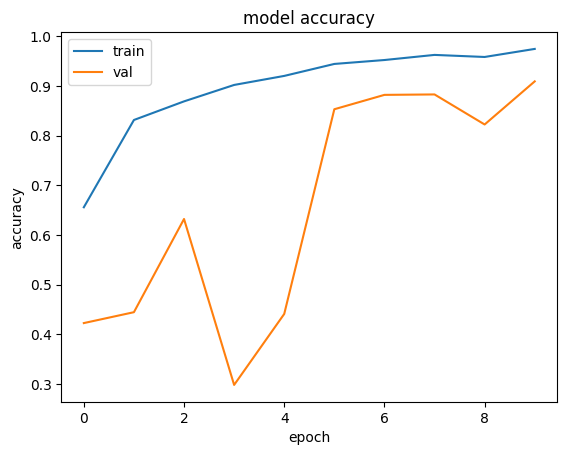

In [ ]:
plt.plot(history.history['accuracy'])
# training accuracy: performance on data it was trained on
plt.plot(history.history['val_accuracy'])
# validation accuracy: how well it does on a dataset it has never seen
# better indicator for real world
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix